In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def normal_pdf(x, mu, sigma_sq):
    return (1 / np.sqrt(2 * np.pi * sigma_sq)) * np.exp(-(x - mu)**2 / (2 * sigma_sq))


In [ ]:
# 다양한 분산 값에 대한 확률 분포를 계산
variances = [1, 1.5, 3, 5]
normalized_probabilities_var = {}

numbers_30 = np.arange(30)
mu_30 = 5

for var in variances:
    pdf_values_var = normal_pdf(numbers_30, mu_30, var)
    total_pdf_var = np.sum(pdf_values_var)
    normalized_probabilities_var[var] = pdf_values_var / total_pdf_var

# 그래프로 결과를 표시
plt.figure(figsize=(12, 6))

for var in variances:
    plt.plot(numbers_30, normalized_probabilities_var[var], label=f'Variance = {var}')

plt.title('Normalized Probabilities for Different Variances')
plt.xlabel('Number')
plt.ylabel('Normalized Probability')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Define the range and mode
x_range = np.arange(0, 31)

mode = 10  # Mode of the distribution #TODO '
skewness = 20  # Adjust this parameter to control the skewness
scale = 1
#### cal mean ! ####
mean = mode - 1

range_min = 0
range_max = 30
data = skewnorm.rvs(a=skewness, loc=mean, scale=2, size=1000)   #loc가 평균을 의미  ...
data = np.clip(data, range_min, range_max)
# Round the continuous data to convert it to discrete values
discrete_data = np.round(data).astype(int)

# Clip data to fit within the desired range (0, 30)
discrete_data = np.clip(discrete_data, range_min, range_max)

# Plot the histogram for the discrete distribution
plt.hist(discrete_data, bins=range(range_min, range_max + 1), density=True, alpha=0.6, color='b', align='left')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Discrete Skewed Distribution with Mode=5 and Range=(0, 30)')
plt.show()

# def calculate_weights(x, N):
#     return (x/N)**2 * np.exp(-0.1 * (x - N)**2)

# # Calculate weights
# weights = calculate_weights(x_range, N)

# # Normalize the weights to make them probabilities
# weights = weights / np.sum(weights)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 가우시안 함수
def gaussian(x, mu, sigma):
    return (1.0 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-((x - mu)**2) / (2 * sigma**2))

def main():
    # 평균과 표준편차 설정
    mean_value = int(input())  # 예시 값
    std_dev = 1.2     # 예시 값

    # x 값 범위 설정
    x = np.linspace(0, 30, 500)

    # 가우시안 함수 계산
    y = gaussian(x, mean_value, std_dev)

    # 그래프 그리기
    plt.plot(x, y)
    plt.title("Gaussian Distribution")
    plt.xlabel("x")
    plt.ylabel("Probability Density")
    plt.grid(True)
    plt.show()
    
main()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, sigma):
    return (1.0 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-((x - mu)**2) / (2 * sigma**2))

def sample_discrete_gaussian(mean_value, std_dev=0.1, lower_bound=0, upper_bound=30):
    x = np.arange(lower_bound, upper_bound+1)
    y = gaussian(x, mean_value, std_dev)
    sampled_value = np.random.choice(x, p=y/np.sum(y))
    return sampled_value

def visuatlize_gaussian(mean, std):
    num_samples = 10000
    samples = [sample_discrete_gaussian(mean, std) for _ in range(num_samples)]

    plt.hist(samples, bins=np.arange(0, 32) - 0.5, density=True, alpha=0.75, label='Sampled Data')

    x = np.arange(0, 31)
    y = gaussian(x, mean, std)
    plt.plot(x, y, label='Theoretical Gaussian')

    plt.xlabel('Value')
    plt.ylabel('Probability')
    plt.title('Discrete Gaussian Sampling')
    plt.legend()
    plt.show()

def example_gaussian():
    std = 5
    visuatlize_gaussian(15, std)

example_gaussian()

In [ ]:
import numpy as np
import random

# 이산 가우시안 확률을 계산하는 함수
def discrete_gaussian_prob(mean_value, std_dev=1, lower_bound=0, upper_bound=30):
    x = np.arange(lower_bound, upper_bound + 1)
    y = (1.0 / np.sqrt(2 * np.pi * std_dev ** 2)) * np.exp(-((x - mean_value) ** 2) / (2 * std_dev ** 2))
    return y / np.sum(y)

# Q-table의 예 (랜덤하게 초기화)
Q_table = np.random.rand(31)
min_val = np.min(Q_table)
max_val = np.max(Q_table)
normalized_Q_table = (Q_table - min_val) / (max_val - min_val)

# 평균 값 (예를 들어, 15)
mean_value = 15
std = 3
# 가우시안 분포의 확률 계산
gaussian_prob = discrete_gaussian_prob(mean_value, 3)

# Q-value와 가우시안 확률을 결합 (예를 들어, 각각에 대해 0.5의 가중치를 적용)
weight = 0.9
combined_prob = (1-weight) * normalized_Q_table / np.max(normalized_Q_table) + weight * gaussian_prob

g = np.argmax(gaussian_prob)
q = np.argmax(Q_table)
print("gaussian", g, "Qtable", q)
c = np.argmax(combined_prob)
print("combine", c)

for _ in range(15) :
    optimal_value = np.random.choice(np.arange(0, 31), p=combined_prob / np.sum(combined_prob))
    print("Sampled optimal value:", optimal_value)



In [ ]:
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum()

gaussian_prob = discrete_gaussian_prob(mean_value, 5)

combined_prob = combined_prob / np.sum(combined_prob)
Q_prob = softmax(np.array(Q_table))
combined_prob_2 = [ g * q for g, q in zip(gaussian_prob, Q_prob)]
combined_prob_normal = np.array(combined_prob_2)/np.sum(combined_prob_2)

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.bar(np.arange(0, 31), combined_prob_normal, color='blue')
plt.xlabel('Value')
plt.ylabel('Combined Probability')
plt.title('Combined Probability Distribution')
plt.figure(figsize=(10, 6))
plt.bar(np.arange(0, 31), combined_prob, color='green')
plt.xlabel('Value')
plt.ylabel('Combined Probability')
plt.title('Combined Probability Distribution')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(np.arange(0, 31), Q_prob, color='skyblue')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability Distribution')
plt.figure(figsize=(10, 6))
plt.bar(np.arange(0, 31), gaussian_prob, color='red')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability Distribution')
plt.show()

In [ ]:
# Read Numpy and transfer to csv file.
import numpy as np

fileName = "q_table_unmask__general"
npyName = "models/"+fileName+".npy"
csvName = "results/csv/"+fileName+".csv"

arr = np.load(npyName)

# 배열을 CSV 파일로 저장
np.savetxt(csvName, arr, delimiter=',')

In [ ]:
def discrete_gaussian_prob(mean, std, lower_bound=0, upper_bound=30):
    x = np.arange(lower_bound, upper_bound + 1)
    y = (1.0 / np.sqrt(2 * np.pi * std ** 2)) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))
    return y / np.sum(y)

gaussian_prob = discrete_gaussian_prob(mean=0, std=5)
filtered_indices = [i for i, p in enumerate(gaussian_prob) if p > 0.075]
print(filtered_indices)

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def plot_normal_distribution(mean, std, num_samples=10000):
    # 정규 분포 생성
    distribution = torch.distributions.Normal(mean, std)

    # 분포에서 샘플링
    samples = distribution.sample((num_samples,))

    # 샘플들로부터 확률 밀도 함수(PDF) 그리기
    plt.hist(samples.numpy(), bins=30, density=True)
    plt.title(f'Normal Distribution with mean={mean} and std={std}')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.show()

plot_normal_distribution(0.25, 5)


In [1]:
## 영상을 불러와서, 2차원에 시각화
import cv2
import numpy as np
from utils.cal_quality import get_FFT, get_MSE

videoName = "RoadVideo_train"
cap = cv2.VideoCapture("./data/"+videoName+".mp4")
FFTList = np.load("./data/FFT/"+videoName+".npy")
MSE_data = []
FFT_data = []

idx = 0
ret, prev_frame = cap.read()
while True:
    # print(idx)
    idx += 1
    ret, frame = cap.read()
    if not ret:
        cap.release()
    x = get_MSE(prev_frame, frame)
    y = FFTList[idx]
    prev_frame = frame
    MSE_data.append(x)
    FFT_data.append(y)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


c:\Users\s_bono0208\AppData\Local\anaconda3\envs\COIN\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\s_bono0208\AppData\Local\anaconda3\envs\COIN\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


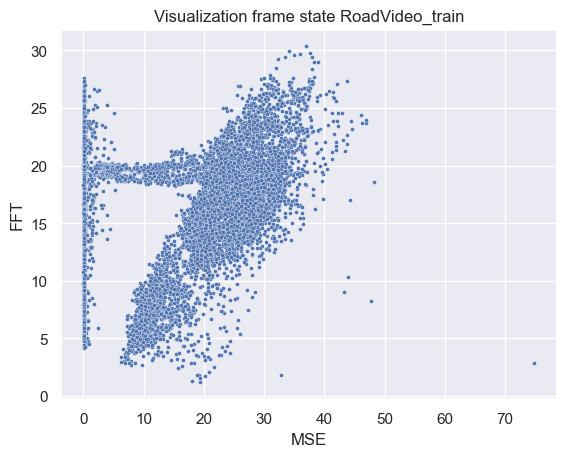

<Figure size 1600x1400 with 0 Axes>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.scatterplot(x=MSE_data, y=FFT_data, s=8, markers='x')

# 그래프 제목과 레이블 추가
plt.title('Visualization frame state RoadVideo_train')
plt.xlabel('MSE')
plt.ylabel('FFT')

plt.figure(figsize=(16, 14))
plt.show()

In [3]:
print(type(MSE_data), type(FFT_data))
print(MSE_data[0], FFT_data[0])
print(len(MSE_data), len(FFT_data))

file_path = "D:\VSC\INFOCOM\FrameDrop-RL\models\cluster\RoadVideotrain_15.pkl"

<class 'list'> <class 'list'>
0.04168438946759259 9.695235373470249
8952 8952


c:\Users\s_bono0208\AppData\Local\anaconda3\envs\COIN\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


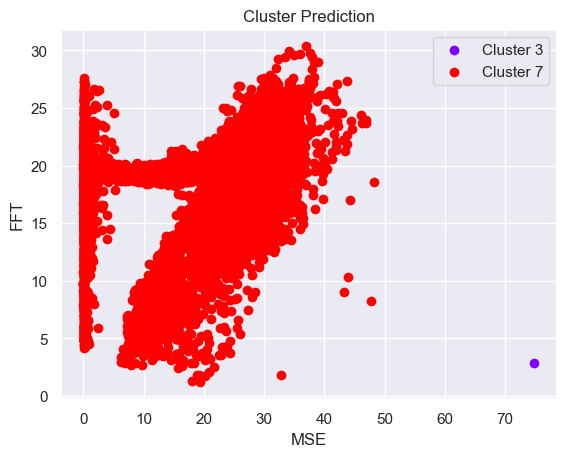

In [4]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 데이터를 불러오는 함수 (MSE_data, FFT_data는 여러분의 데이터에 맞게 수정 필요)

# 클러스터링 모델을 불러오는 함수
def load_cluster_model(model_path=file_path):
    cluster_model = joblib.load(model_path)
    return cluster_model

# 데이터를 클러스터링하여 예측
def predict_clusters(model, data):
    # 여러분의 데이터에 따라 특징을 추출하고 데이터를 정규화할 필요가 있을 수 있음
    features = np.column_stack((MSE_data, FFT_data))
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(features)

    # 클러스터 예측
    predictions = model.predict(scaled_data)
    return predictions

# 클러스터 예측 결과를 시각화
def visualize_clusters(data, predictions):
    unique_clusters = np.unique(predictions)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_clusters)))

    for cluster, color in zip(unique_clusters, colors):
        cluster_data = data[predictions == cluster]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=[color], label=f'Cluster {cluster}')

    plt.xlabel('MSE')  # 여러분의 데이터에 맞게 수정 필요
    plt.ylabel('FFT')  # 여러분의 데이터에 맞게 수정 필요
    plt.title('Cluster Prediction')
    plt.legend()
    plt.show()

# 메인 함수
def main():
    cluster_model = load_cluster_model()
    predictions = predict_clusters(cluster_model, np.column_stack((MSE_data, FFT_data)))
    visualize_clusters(np.column_stack((MSE_data, FFT_data)), predictions)


main()


c:\Users\s_bono0208\AppData\Local\anaconda3\envs\COIN\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


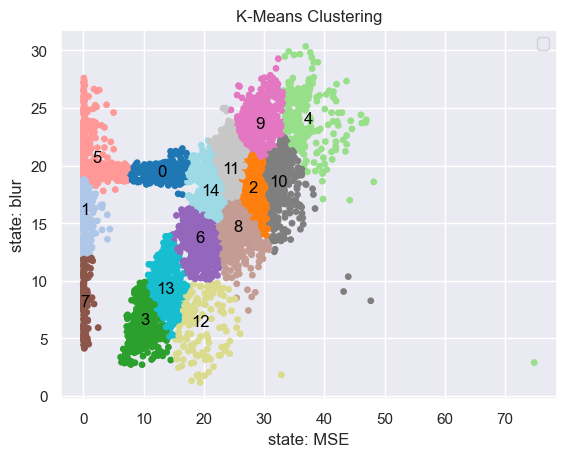

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

def get_state_distribution_10(model, data, clusterPath):
    labels = model.predict(data)
    print(data[0], labels[0])
    centers = model.cluster_centers_
    dfData = pd.DataFrame(data, columns=['X', 'Y'])
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(dfData['X'], dfData['Y'], c=labels, s=15, cmap='tab20')

    # ax.legend([f'Cluster {i}' for i in range(15)], loc='upper left')

    ax.set_title('K-Means Clustering')
    ax.set_xlabel('state: MSE')
    ax.set_ylabel('state: blur')

    
    # Add legend
    # legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    # ax.add_artist(legend1)
    
    plt.show()

# Example usage:
# get_state_distribution(your_model, your_data, your_cluster_path)


# Example usage:
# get_state_distribution(your_model, your_data, your_cluster_path)


def get_state_distribution_11(model, data, clusterPath):
    labels = model.predict(data)
    centers = model.cluster_centers_
    dfData = pd.DataFrame(data, columns=['X', 'Y'])

    fig, ax = plt.subplots()
    
    # Plot data points with cluster colors
    scatter = ax.scatter(dfData['X'], dfData['Y'], c=labels, s=15, cmap='tab20')
    
    # Plot cluster centers
    #ax.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=50, label='Cluster Centers')

    for i, txt in enumerate(range(len(centers))):
        ax.annotate(txt, (centers[i, 0], centers[i, 1]), fontsize=12, color='black', ha='center', va='center')

    ax.set_title('K-Means Clustering')
    ax.set_xlabel('state: MSE')
    ax.set_ylabel('state: blur')
    
    ax.legend(loc='upper right')

    plt.show()

cluster_model = load_cluster_model()
get_state_distribution_11(cluster_model, np.column_stack((MSE_data, FFT_data)), file_path)